## Import required modules

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable

# import _utils

import session_info
session_info.show()

In [2]:
# import a module given the full path?
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/ROIenrichment.py")
ROIenrichment = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = ROIenrichment
spec.loader.exec_module(ROIenrichment)

spec = importlib.util.spec_from_file_location("module.name", "/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/_utils.py")
_utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = _utils
spec.loader.exec_module(_utils)

## Variables

In [3]:
### ver 20230103 ###

colormap='tab20'
palette={}
palette['adipose_tissue']=plt.get_cmap(colormap).colors[0]
palette['endocardium']=plt.get_cmap(colormap).colors[1]
palette['epicardium_subepicardium']=plt.get_cmap(colormap).colors[2]
palette['fibrosis']=plt.get_cmap(colormap).colors[3]
palette['myocardium']=plt.get_cmap(colormap).colors[5]
palette['nerve']=plt.get_cmap(colormap).colors[4]
palette['node']=plt.get_cmap(colormap).colors[6]
palette['vessel']=plt.get_cmap(colormap).colors[7]
palette['AV_bundle']=plt.get_cmap(colormap).colors[8]
palette['myocardium_atrial']=plt.get_cmap(colormap).colors[9]
palette['myocardium_ventricular']=plt.get_cmap(colormap).colors[10]
palette['cardiac_skeleton']=plt.get_cmap(colormap).colors[11]
palette['membraneous_septum']=plt.get_cmap(colormap).colors[12]
palette['purkinje-like']=plt.get_cmap(colormap).colors[13]
palette['haemorrhage']=plt.get_cmap(colormap).colors[14]

## Read in anndata

In [4]:
adata_vis = _utils.read_visium('/nfs/team205/heart/anndata_objects/8regions/visium-OCT_adult-8reg-revision_raw.h5ad',
                               lognorm=True,  cellname_convert=False)
adata_vis

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


AnnData object with n_obs × n_vars = 93788 × 23532
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'annotation_JC', 'sangerID', 'Publication', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'region_cell2loc', 'annotation_final', 'Adip1', 'Adip2', 'Adip3', 'B', 'B_plasma', 'CD14+Mo', 'CD16+Mo', 'CD4+T_act', 'CD4+T_naive', 'CD8+T_cytox', 'CD8+T_em', 'CD8+T_te', 'CD8+T_trans', 'DC', 'EC10_CMC-like', 'EC1_cap', 'EC2_cap', 'EC3_cap', 'EC4_immune', 'EC5_art', 'EC6_ven', 'EC7_endocardial', 'EC8_ln', 'FB1', 'FB2', 'FB3', 'FB4_activated', 'FB5', 'FB6', 'ILC', 'LYVE1+IGF1+MP', 'LYVE1+MP_cycling', 'LYVE1+TIMD4+MP', 'MAIT-like', 'Mast', 'Meso', 'MoMP', 

In [5]:
category_name='annotation_final'

In [8]:
sc.set_figure_params(dpi=120)

## For Fig1

##### HCAHeartST10659160 #####


/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


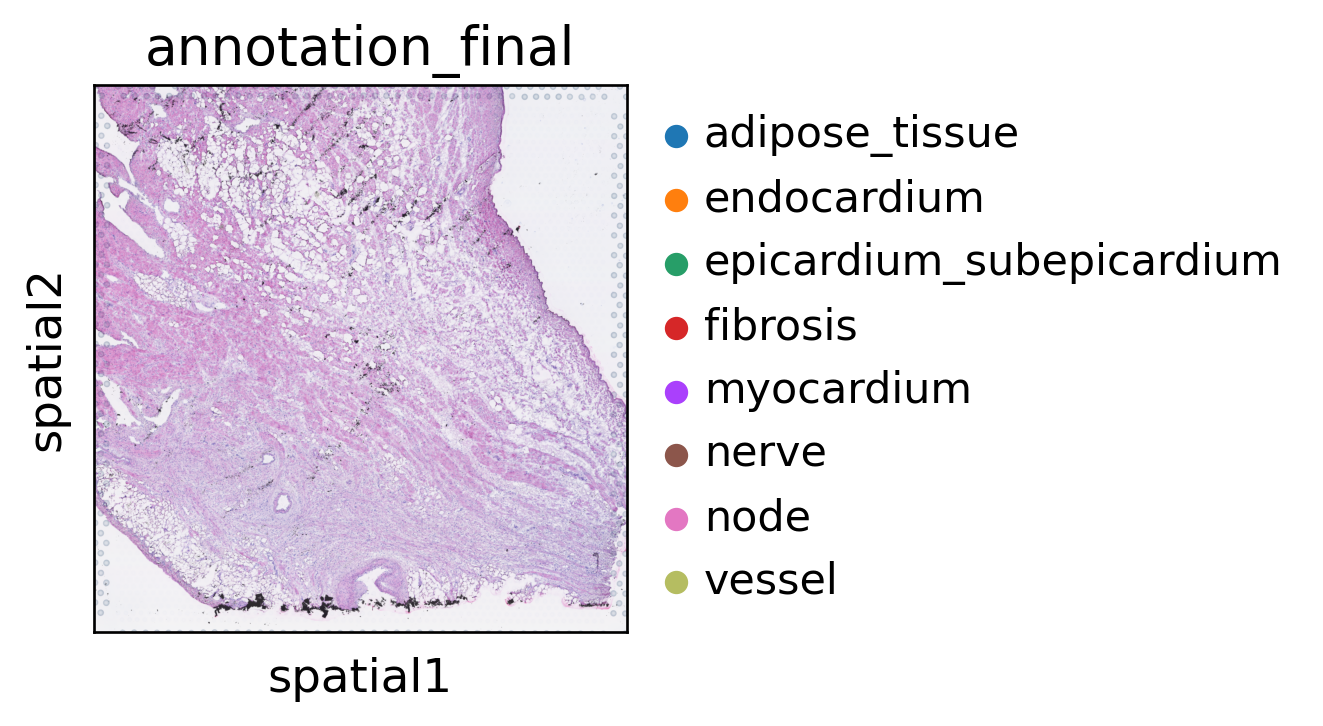

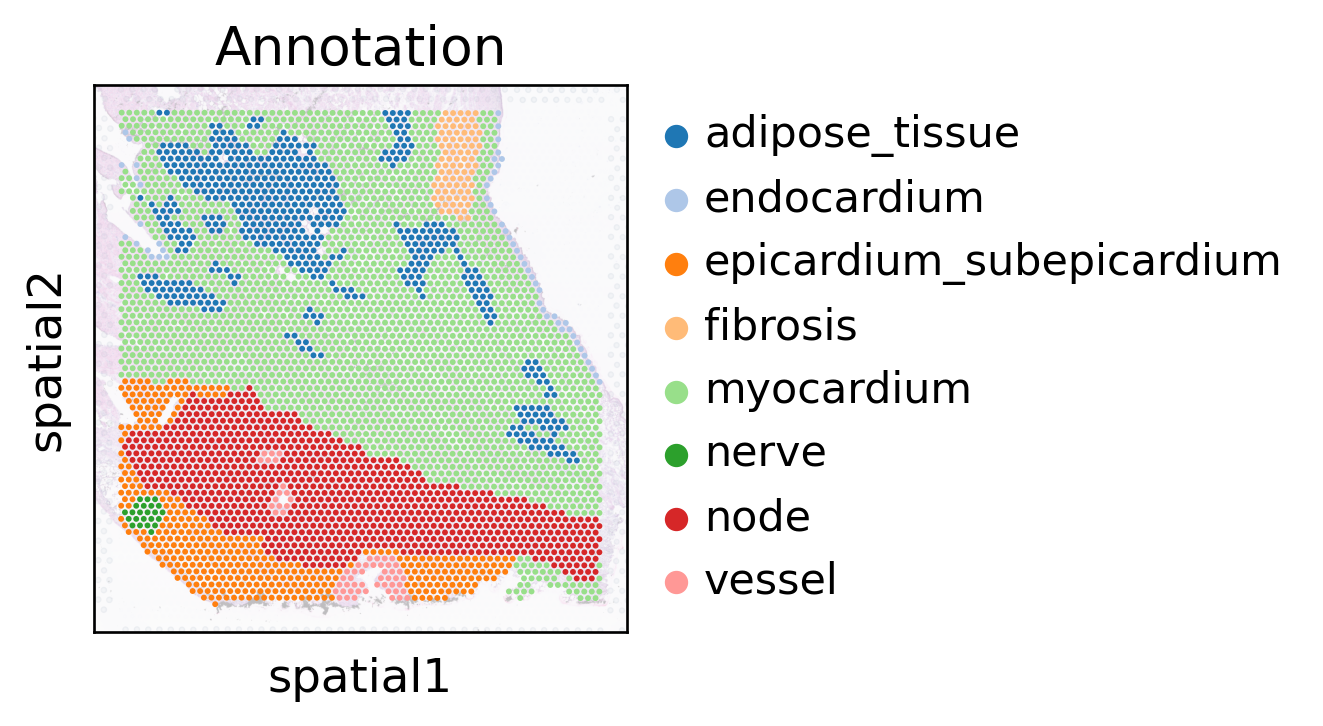

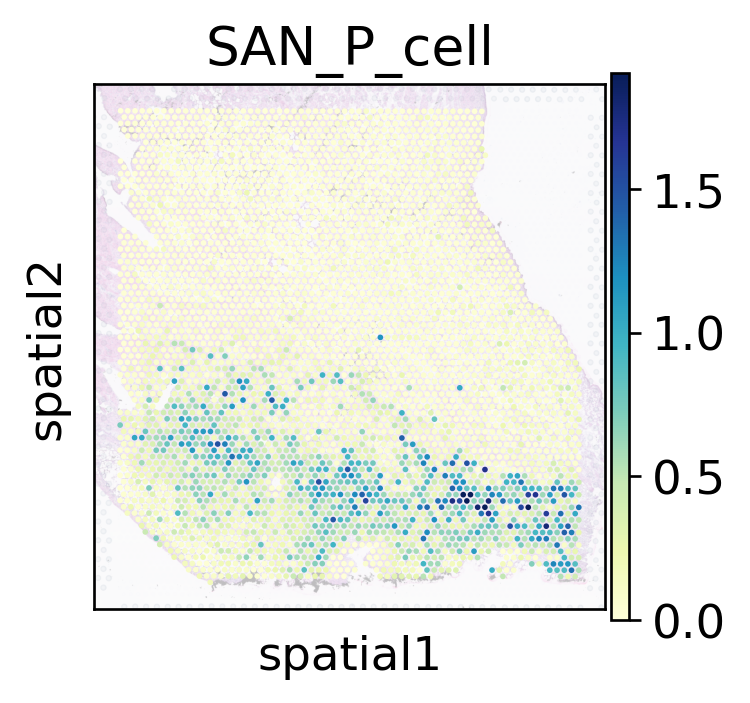

In [11]:
# SAN

ID = 'HCAHeartST10659160'
print(f'##### {ID} #####')

# annotations
slide = _utils.select_multislide(adata_vis, [ID], s_col='sample')

with mpl.rc_context({'figure.figsize': [3, 3],
                        'axes.titlesize':16,}):
    # HE image
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=[category_name], 
                  ncols=6, wspace=0.25,
                  size=0,img_key='hires',alpha_img=1,vmin=0, vmax='p99.7',
                  # save=f'_Fig1_{ID}_HE.pdf'
                 )

    # annotation
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=[category_name], 
                  ncols=6, wspace=0.25,
                  size=1.2,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.7',
                  title='Annotation',palette=palette,
                  # save=f'_Fig1_{ID}_annotations.pdf'
                 )

    # cells
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=['SAN_P_cell'], 
                  ncols=5, wspace=0.25,hspace=0.3,
                  size=1.2,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.9',
                  # save=f'_Fig1_{ID}_core_cellstates.pdf'
                 )

##### HCAHeartST13228103 #####


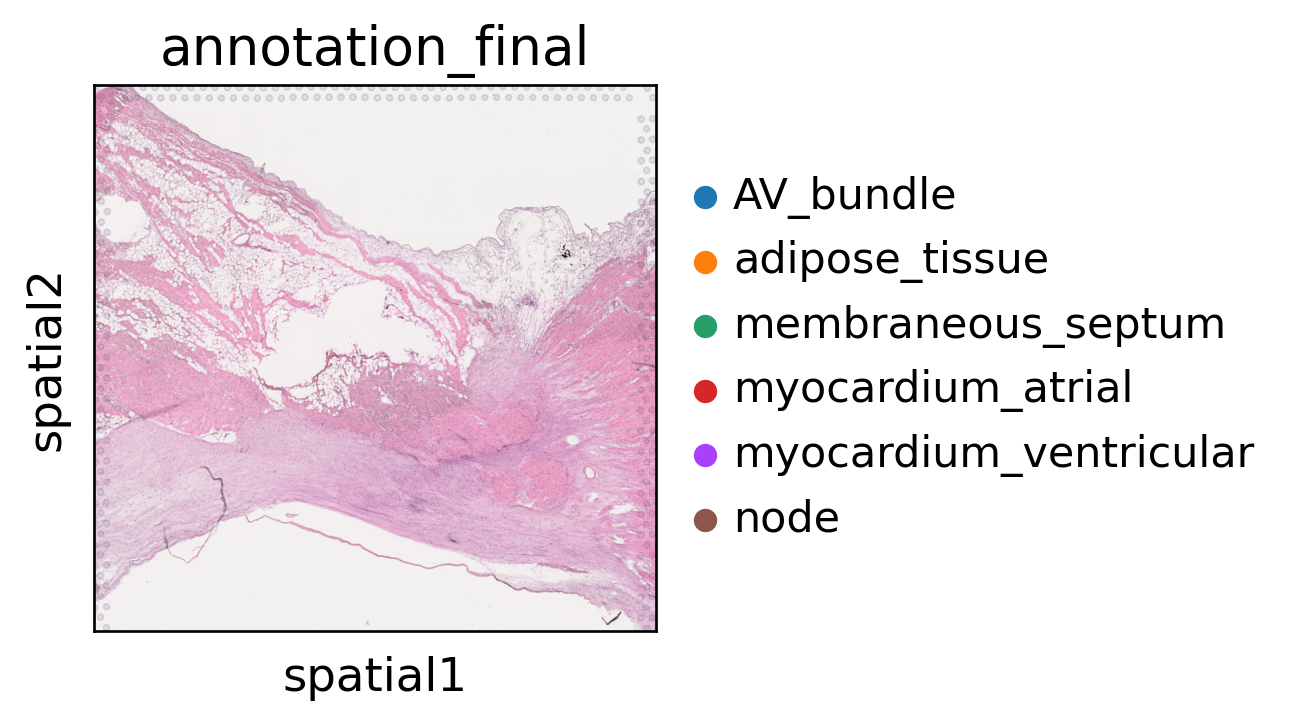

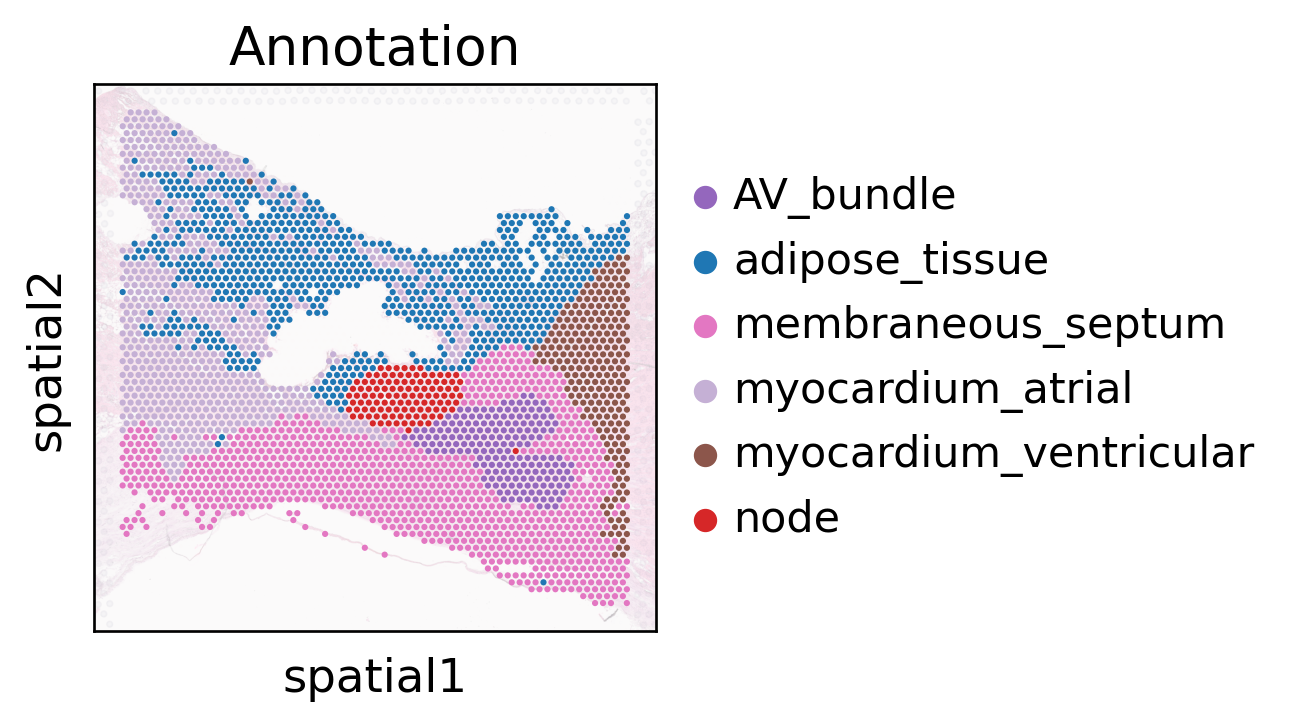

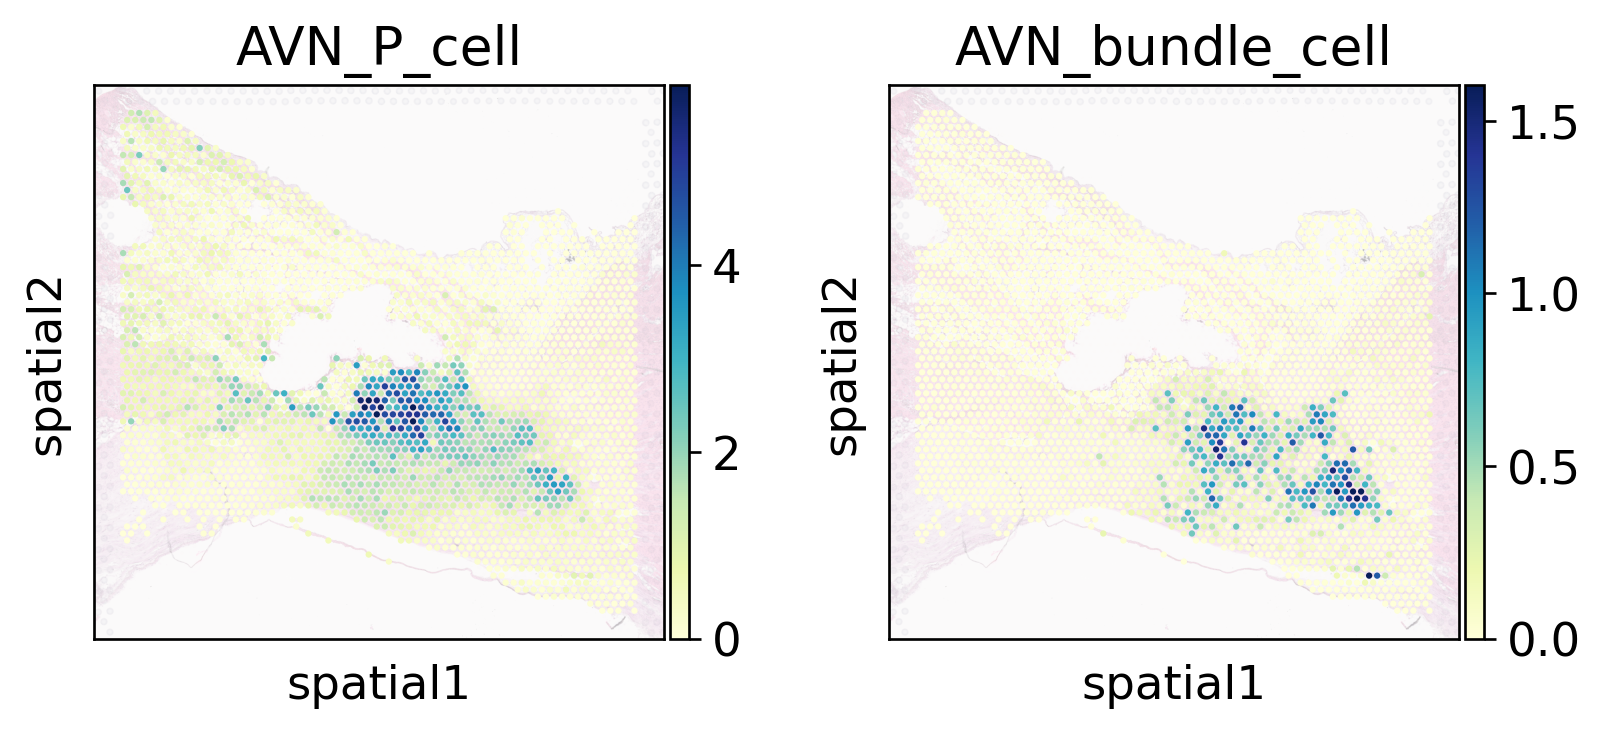

In [10]:
ID = 'HCAHeartST13228103'
print(f'##### {ID} #####')

# annotations
slide = _utils.select_multislide(adata_vis, [ID], s_col='sample')

with mpl.rc_context({'figure.figsize': [3, 3],
                        'axes.titlesize':16,}):
    # HE image
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=[category_name], 
                  ncols=6, wspace=0.25,
                  size=0,img_key='hires',alpha_img=1,vmin=0, vmax='p99.7',
                  # save=f'_Fig1_{ID}_HE.pdf'
                 )

    # annotation
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=[category_name], 
                  ncols=6, wspace=0.25,
                  size=1.2,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.7',
                  title='Annotation',palette=palette,
                  # save=f'_Fig1_{ID}_annotations.pdf'
                 )

    # cells
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=['AVN_P_cell',
                      'AVN_bundle_cell',], 
                  ncols=5, wspace=0.25,hspace=0.3,
                  size=1.2,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.9',
                  # save=f'_Fig1_{ID}_core_cellstates.pdf'
                 )